### About the data`

Unicorn Investors wants to make an investment in a new form of transportation - JetRail. JetRail uses Jet propulsion technology to run rails and move people at a high speed! The investment would only make sense, if they can get more than 1 Million monthly users with in next 18 months. In order to help Unicorn Ventures in their decision, you need to forecast the traffic on JetRail for the next 7 months. You are provided with traffic data of JetRail since inception in the test file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
import datetime

In [3]:
def parser(x):
    return datetime.strptime(x,'%d-%m-%Y %H:%M')

In [4]:
train = pd.read_csv('https://raw.githubusercontent.com/pankush9096/Time-Series---Jetrails-problems/master/Train_SU63ISt.csv', parse_dates=['Datetime'])

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null datetime64[ns]
Count       18288 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 428.8 KB


In [6]:
train_original  = train.copy()

In [7]:
train_original['Year'] = train_original.Datetime.dt.year
train_original['month'] = train_original.Datetime.dt.month
train_original['day'] = train_original.Datetime.dt.day
train_original['hour'] = train_original.Datetime.dt.hour
train_original['dow'] = train_original.Datetime.dt.dayofweek

In [8]:
train_original['dow']

0        5
1        5
2        5
3        5
4        5
        ..
18283    3
18284    3
18285    3
18286    3
18287    3
Name: dow, Length: 18288, dtype: int64

In [9]:
train_original['weekend'] = train_original['dow'].apply(lambda x: 1 if x ==5 or x == 6 else 0)

In [10]:
train_original['weekenda'] = train_original['dow'].map(lambda x: 1 if x ==5 or x == 6 else 0)

In [11]:
train_original.drop(columns= ['weekenda'], inplace = True)

#### Visulization

In [12]:
import seaborn as sns

In [13]:
train_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 9 columns):
ID          18288 non-null int64
Datetime    18288 non-null datetime64[ns]
Count       18288 non-null int64
Year        18288 non-null int64
month       18288 non-null int64
day         18288 non-null int64
hour        18288 non-null int64
dow         18288 non-null int64
weekend     18288 non-null int64
dtypes: datetime64[ns](1), int64(8)
memory usage: 1.3 MB


### Weekend vs weekday comparison

In [14]:
train_original.set_index('Datetime', inplace = True)

Text(0, 0.5, 'Count')

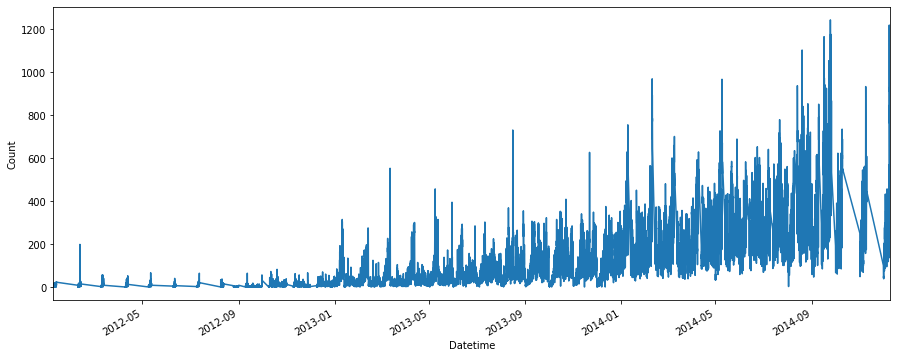

In [15]:
fig = plt.figure(figsize = (15,6))
train_original.Count.plot()
plt.ylabel('Count')

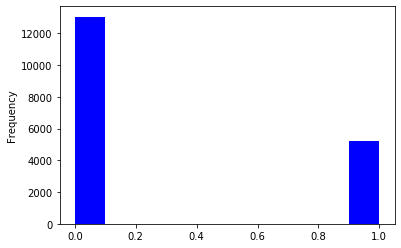

In [16]:
train_original.weekend.plot.hist(color = ['blue', 'red'])

### EDA
Now we will verify and explore the data based on the Hypothesis


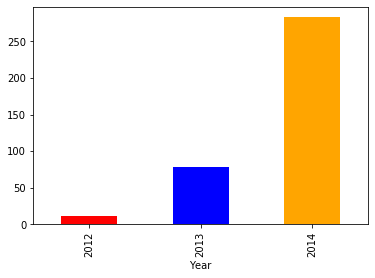

In [17]:
train_original.groupby('Year').Count.mean().plot(kind = 'bar', colors = ['red', 'blue', 'orange'])

We can see the Count increases as the Year moves

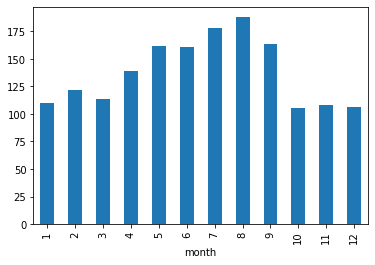

In [18]:
# More population with respect to the Month

train_original.groupby('month').Count.mean().plot(kind = 'bar')

Conclusion : the Population is more in the July and october month

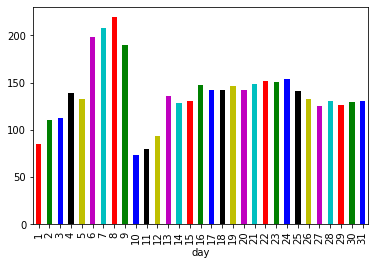

In [19]:
#More population based on the day
my_colors = list('rgbkymc')
train_original.groupby('day').Count.mean().plot(kind = 'bar', colors = my_colors)


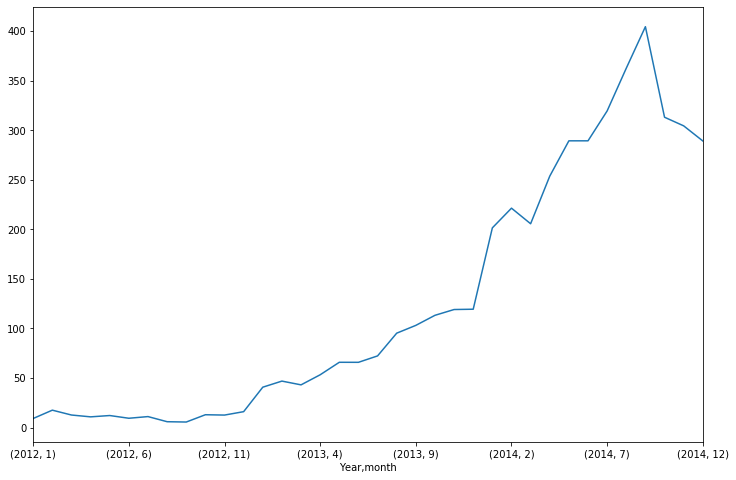

In [20]:
### Lineplot of year, month vs count
fig= plt.figure(figsize = (12,8))
train_original.groupby(['Year', 'month']).Count.mean().plot()

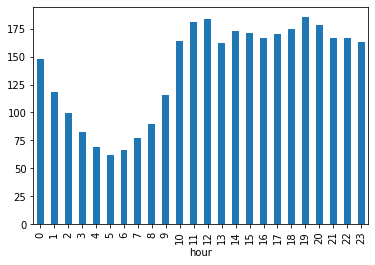

In [21]:
### Hourly trend in the count
train_original.groupby('hour').Count.mean().plot(kind = 'bar')

#### Conclusion : The Population count increases from the time 8am in the morning to goes on in upto certain limit and ends in the constant values

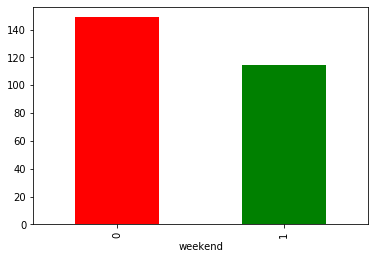

In [22]:
# Weekend count vs weekday count
train_original.groupby('weekend').Count.mean().plot(kind = 'bar', colors = ['red', 'green'])

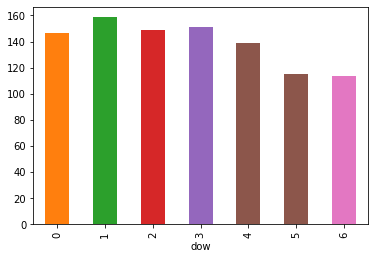

In [23]:
#Count on the weekdays
train_original.groupby('dow').Count.mean().plot(kind = 'bar', colors = ['C1','C2','C3','C4','C5','C5','C6','C7'])

### Seems to have the Tuesaday as the highest Count 
we can verify that weekdays has more traffic than weekday

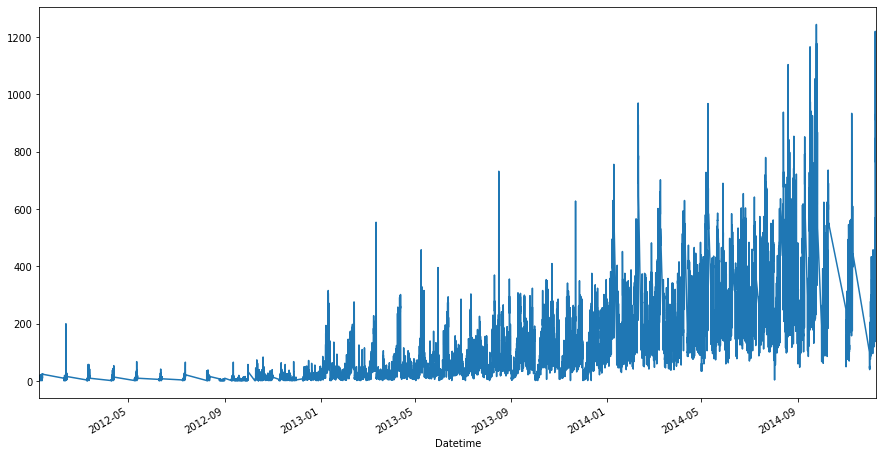

In [30]:
train_original.Count.plot(figsize= (15,8))

As we can see traffic based on hourly freq has very much noise, so we try to resample it to daily, monthly, weekly, yearly

In [35]:
# yearly sample
yearly = train_original.resample('Y').mean()
# Monthly sample
monthly = train_original.resample('M').mean()
# weekly
weekly = train_original.resample('W').mean()
#Daily
daily = train_original.resample('D').mean()


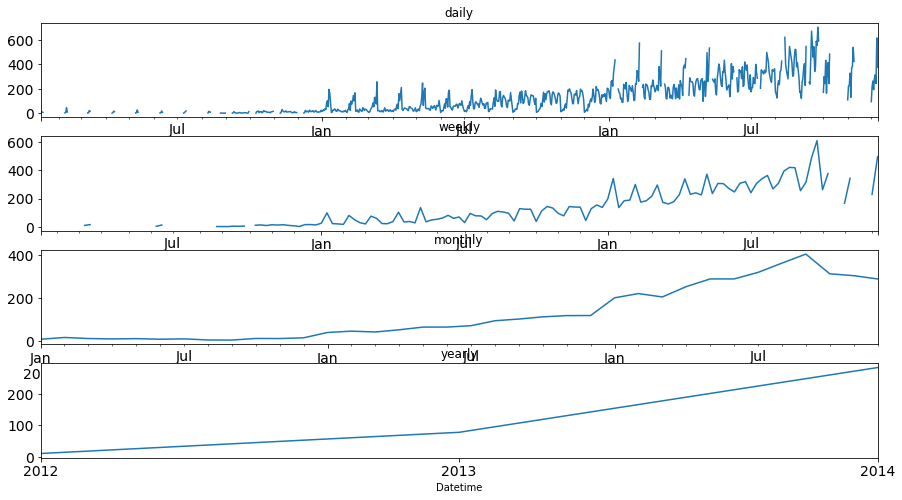

In [41]:
fig, axs = plt.subplots(4,1, figsize = (15,8))
daily.Count.plot(title = 'daily', fontsize = 14, ax = axs[0])
monthly.Count.plot(title = 'monthly', fontsize = 14, ax = axs[2])
weekly.Count.plot(title = 'weekly', fontsize = 14, ax = axs[1])
yearly.Count.plot(title = 'yearly', fontsize = 14, ax= axs[3])


we can see data is getting more aggregated as we move from hourly to daily to monthly to yearly

So we will take daily frequency to get to our prediction, so we are using resampling to change freq from hourly to monthly, but when you will be predicting test values then we have to convert these daily to hourly frequency, so i will do it with daily and hourly both.

In [42]:
train = train_original.resample('D').mean()
test = train_original.resample('D').mean()

In [83]:
test = train_original.resample('D').mean()

In [85]:
train.dropna(inplace = True)

In [46]:
### Dividing the data into training and validation

In [86]:
training = train.loc['2012-08':'2014-05']
validation  = train.loc['2014-06':'2014-09']

In [87]:
training.shape

(602, 8)

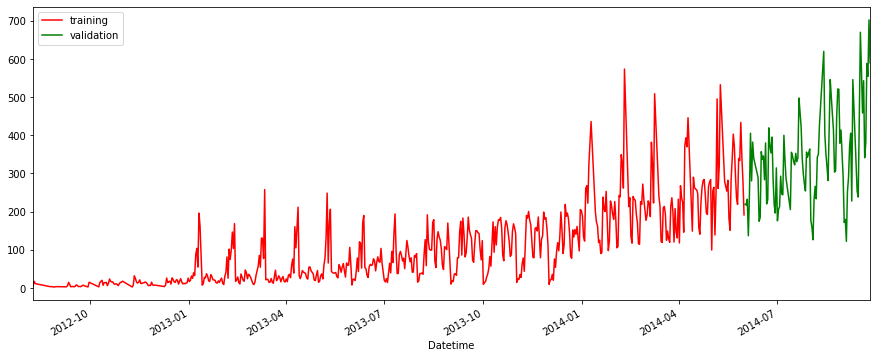

In [88]:
plt.figure(figsize= (15,6))
training.Count.plot(colors = 'red', kind = 'line', label = 'training')
validation.Count.plot(colors = 'green', label = 'validation')
plt.legend()


# TSA

### Timeseries Analysis techniques

#### Naive Approach
In this forecasting technique, we assume that the next expected point is equal to the last observed point. So we can expect a straight horizontal line as the prediction.



In [89]:
# dd= np.asarray(training.Count) 
y_hat = validation.copy()
# y_hat['naive'] = 
y_hat['naive'] = training.Count[len(training.Count)-1] 

In [90]:
training.tail()

,ID,Count,Year,month,day,hour,dow,weekend
Datetime,,,,,,,,
2014-05-27,15371.5,333.583333,2014.0,5.0,27.0,11.5,1.0,0.0
2014-05-28,15395.5,433.750000,2014.0,5.0,28.0,11.5,2.0,0.0
2014-05-29,15419.5,341.750000,2014.0,5.0,29.0,11.5,3.0,0.0
2014-05-30,15443.5,280.000000,2014.0,5.0,30.0,11.5,4.0,0.0
2014-05-31,15467.5,191.333333,2014.0,5.0,31.0,11.5,5.0,1.0


In [91]:
y_hat.head()

,ID,Count,Year,month,day,hour,dow,weekend,naive
Datetime,,,,,,,,,
2014-06-01,11987.5,219.333333,2014.0,6.0,1.0,11.5,6.0,1.0,191.333333
2014-06-02,12731.5,216.916667,2014.0,6.0,2.0,11.5,0.0,0.0,191.333333
2014-06-03,13403.5,232.416667,2014.0,6.0,3.0,11.5,1.0,0.0,191.333333
2014-06-04,14147.5,136.666667,2014.0,6.0,4.0,11.5,2.0,0.0,191.333333
2014-06-05,14867.5,243.250000,2014.0,6.0,5.0,11.5,3.0,0.0,191.333333


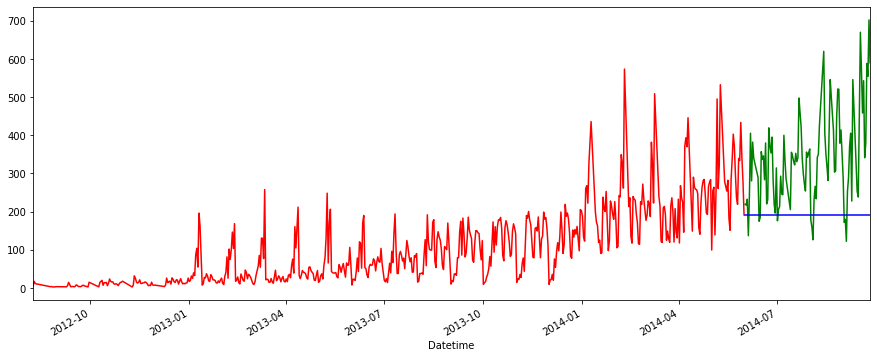

In [92]:
fig = plt.figure(figsize=(15,6))
training.Count.plot(label = 'training',colors = 'r')
validation.Count.plot(label = 'validation',colors =  'g')
y_hat.naive.plot(label = 'naive', colors = 'b')

In [93]:
from sklearn.metrics import mean_squared_error

In [94]:
rsme = np.sqrt(mean_squared_error(validation.Count, y_hat.naive))

In [95]:
rsme

192.40892918922975

#### Moving average
In this technique we will take the average of the passenger counts for last few time periods only.

we will consider for 10,20,50 last values

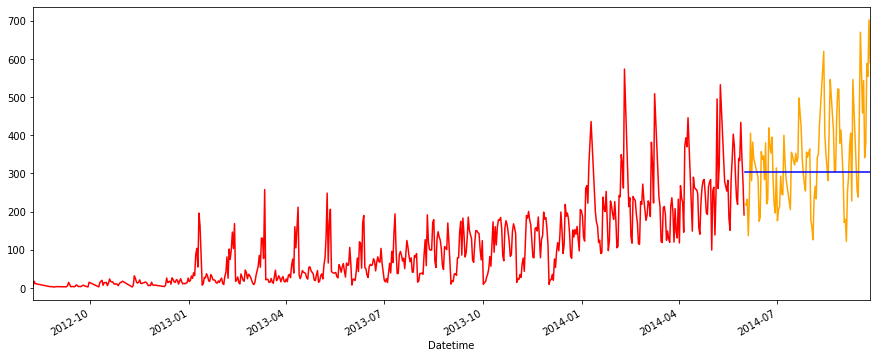

In [104]:
y_hat = validation.copy()
validation['moving_avg'] = training.Count.rolling(10).mean().iloc[-1]
plt.figure(figsize=(15,6))
training.Count.plot(colors= 'red', label = 'training')
validation.Count.plot(colors = 'orange',label= 'validation')
validation.moving_avg.plot(colors = 'blue', label = 'moving_avg')
plt.show()

In [105]:
#rmse of the model
rmse = np.sqrt(mean_squared_error(y_hat.moving_avg, validation.Count))
rmse

232.4908207566723

####  For mean of 50 observations

In [125]:
y_hat['average_mean_50'] = training.Count.rolling(50).mean().iloc[-1]

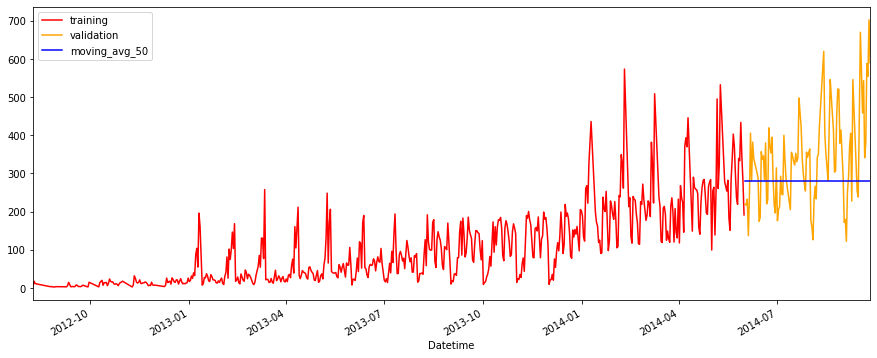

In [126]:
#Ploting the graph
plt.figure(figsize= (15,6))
training.Count.plot(colors = 'red', label = 'training')
validation.Count.plot(colors = 'orange', label = 'validation')
y_hat.average_mean_50.plot(colors= 'blue', label = 'moving_avg_50')
plt.legend(loc = 'best')

In [127]:
rsme = np.sqrt(mean_squared_error(validation.Count, y_hat.average_mean_50))
rmse

232.4908207566723